#### 数据列描述
- 'step', 对应现实中的时间单位 h
- 'type', 转账类型
- 'amount', 转账金额
- 'nameOrig', 转账发起人
- 'oldbalanceOrg',转账钱发起人的账户余额
- 'newbalanceOrig',转账后发起人账户余额
- 'nameDest', 转账收款人
- 'oldbalanceDest', 转账钱收款人账户余额，收款人是商户时候，M大头的收款人，没有该信息
- 'newbalanceDest', 转账后收款人的账户余额，收款人是商户时候，M大头的收款人，没有该信息
- 'isFraud',该账户转账行为是欺诈行为，这里的欺诈行为是指通过掌控客户账户，让后将其金额全部转账到另一哥账户，最后全部提现
- 'isFlaggedFraud'商业模型为了控制大额转账并且标记未非法操，在这里 非法操作是指单笔转账中，转账金额会超过200，000

# 1、模块准备

In [15]:
import numpy as np
import pandas as  
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from scipy.stats import skew,boxcox
import zipfile
import os

In [17]:
cd /Users/lishulong/PycharmProjects/data_analysis/datasets/paysim

/Users/lishulong/PycharmProjects/data_analysis/datasets/paysim


In [19]:
zipfile_path = os.path.join(os.getcwd(),'paysim1.zip')

In [23]:
csvfile_path = os.path.join(os.getcwd(),'PS_20174392719_1491204439457_log.csv')

In [22]:
with zipfile.ZipFile(zipfile_path) as zf:
    zf.extractall(os.getcwd())

In [24]:
raw_data = pd.read_csv(csvfile_path)

In [25]:
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [32]:
raw_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## 2、探索性数据分析 EDA 以及可视化

转账类型记录统计
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


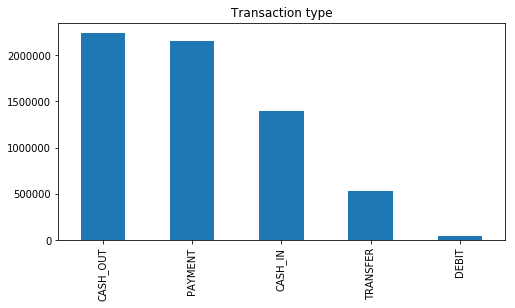

In [42]:
print('转账类型记录统计')
print(raw_data['type'].value_counts())

fig,ax = plt.subplots(1,1,figsize=(8,4))
raw_data['type'].value_counts().plot(kind='bar',title='Transaction type',ax=ax,figsize=(8,4))
plt.show()

转账类型和欺诈标记的记录


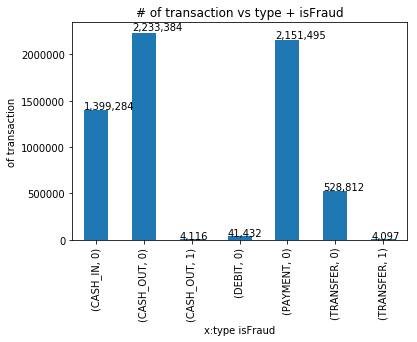

In [43]:
print('转账类型和欺诈标记的记录')
ax = raw_data.groupby(['type','isFraud']).size().plot(kind='bar')
ax.set_title('# of transaction vs type + isFraud')
ax.set_xlabel('x:(type ,isFraud)')
ax.set_ylabel('of transaction')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))

转账类型和商业模型标记欺诈标记的记录


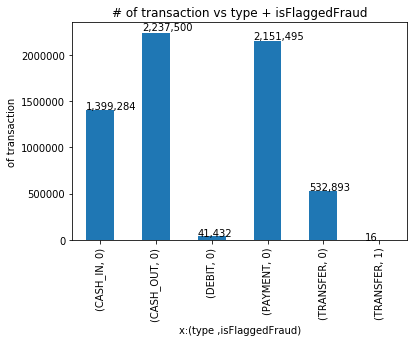

In [44]:
print('转账类型和商业模型标记欺诈标记的记录')
ax = raw_data.groupby(['type','isFlaggedFraud']).size().plot(kind='bar')
ax.set_title('# of transaction vs type + isFlaggedFraud')
ax.set_xlabel('x:(type ,isFlaggedFraud)')
ax.set_ylabel('of transaction')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))

### 通过上面的两个图表，可以看出在thransfer类型中，商业模型标记出的欺诈有16条记录，而实际应该有4097条，这个项目的目的是近可能的精确预测/检测出欺诈记录，接着着重分析 transfer类型的记录

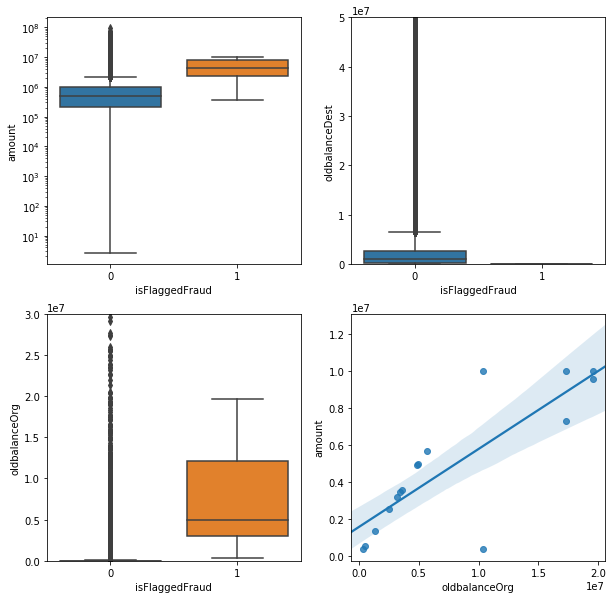

In [49]:
fig ,axs = plt.subplots(2,2,figsize=(10,10))
transfer_data = raw_data[raw_data['type']=='TRANSFER']

a = sns.boxplot(x='isFlaggedFraud',y='amount',data=transfer_data,ax=axs[0][0])
axs[0][0].set_yscale('log')

b = sns.boxplot(x='isFlaggedFraud',y='oldbalanceDest',data=transfer_data,ax=axs[0][1])
axs[0][1].set(ylim=(0,0.5e8))

c = sns.boxplot(x='isFlaggedFraud',y='oldbalanceOrg',data=transfer_data,ax=axs[1][0])
axs[1][0].set(ylim=(0,3e7))

d = sns.regplot(x='oldbalanceOrg',y='amount',data=transfer_data[transfer_data['isFlaggedFraud']==1],ax=axs[1][1])

plt.show()

### 3、数据清理

In [59]:
user_data = raw_data[(raw_data['type']=='TRANSFER') | (raw_data['type']=='CASH_OUT')]
user_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [60]:
user_data.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

/Users/lishulong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
user_data.headd()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [63]:
user_data.reset_index(drop=True,inplace=True)

In [64]:
user_data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
2,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
3,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
4,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [65]:
type_label_encoder = preprocessing.LabelEncoder()
type_category = type_label_encoder.fit_transform(user_data['type'].values)

In [69]:
type_label_encoder

LabelEncoder()

In [70]:
type_category

array([1, 0, 0, ..., 0, 1, 0])

In [71]:
user_data['typeCategory'] = type_category

/Users/lishulong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
user_data.headad()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeCategory
0,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,1
1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
2,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
3,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,1
4,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


### 变量间的相关性

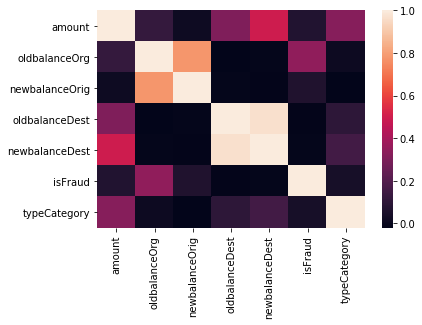

In [73]:
sns.heatmap(user_data.corr())

### 3、查看转账类型记录个数

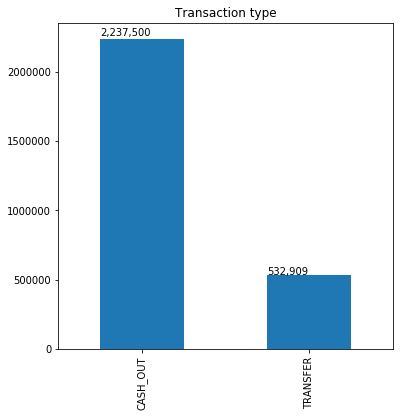

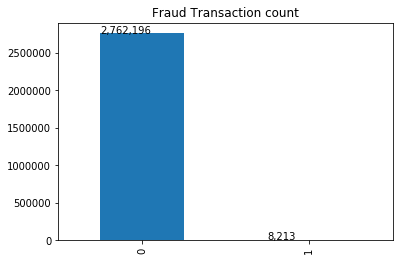

In [84]:
ax = user_data['type'].value_counts().plot(kind='bar',title='Transaction type',figsize=(6,6))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
plt.show()
ax = pd.value_counts(user_data['isFraud'],sort=True).sort_index().plot(kind='bar',title='Fraud Transaction count')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()))
plt.show()

In [86]:
x= user_data
y = user_data['isFraud']
print(x.head())
print(y.head())

       type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  TRANSFER     181.00          181.0             0.0             0.0   
1  CASH_OUT     181.00          181.0             0.0         21182.0   
2  CASH_OUT  229133.94        15325.0             0.0          5083.0   
3  TRANSFER  215310.30          705.0             0.0         22425.0   
4  TRANSFER  311685.89        10835.0             0.0          6267.0   

   newbalanceDest  isFraud  typeCategory  
0            0.00        1             1  
1            0.00        1             0  
2        51513.44        0             0  
3            0.00        0             1  
4      2719172.89        0             1  
0    1
1    1
2    0
3    0
4    0
Name: isFraud, dtype: int64


In [131]:
number_records_fraud = len(user_data[user_data['isFraud']==1])

In [132]:
number_records_fraud

8213

In [133]:
fraud_indices = user_data[user_data['isFraud']==1].index.values

In [134]:
fraud_indices

array([      0,       1,     123, ..., 2770406, 2770407, 2770408])

In [135]:
no_fraud_indexs = user_data[user_data['isFraud']==0].index

In [136]:
# no_fraud_indexs = np.array(no_fraud_indexs)

In [137]:
no_fraud_indexs

Int64Index([      2,       3,       4,       5,       6,       7,       8,
                  9,      10,      11,
            ...
            2770103, 2770104, 2770105, 2770106, 2770107, 2770108, 2770109,
            2770110, 2770111, 2770112],
           dtype='int64', length=2762196)

#### 随机选择相同数量的非欺诈记录

In [138]:
random_nofraud_index = np.random.choice(no_fraud_indexs,number_records_fraud,replace=False)
random_nofraud_index = np.array(random_nofraud_index)

In [139]:
random_nofraud_index

array([1922169,  609484, 1419987, ...,   98590, 1567218, 1862123])

In [140]:
under_sample_index = np.concatenate([fraud_indices,random_nofraud_index])

In [141]:
under_sample_data = user_data.iloc[under_sample_index,:]

In [142]:
under_sample_data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeCategory
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,1
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
123,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,1
124,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
192,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,1


In [143]:
x_undersample = under_sample_data.values
y_undersample = under_sample_data['isFraud'].values

In [144]:
print('非欺诈记录比例：',len(under_sample_data[under_sample_data['isFraud']==0])/len(under_sample_data))

非欺诈记录比例： 0.5


In [145]:
print('欺诈记录比例：',len(under_sample_data[under_sample_data['isFraud']==1])/len(under_sample_data))

欺诈记录比例： 0.5


In [146]:
print('采样数据',len(under_sample_data))

采样数据 16426
